# Additional utilities and plots

In this notebook we show some additional utilities and plots for manipulation of spectrograms.


## 1. Imports

First we import the library of functions.

In [1]:
from utilities_store import *

## 2. Obtain spectrogram of the signal

First we obtain the spectrogram of the signal.

In [3]:
spectrogram, signal = get_spectrogram('A_maj_4_noisy.wav', N = 1000, step_size = 250, 
                                          power_threshold = 1e-9, amp_threshold = 1e-8)

NameError: name 'FptConfig' is not defined

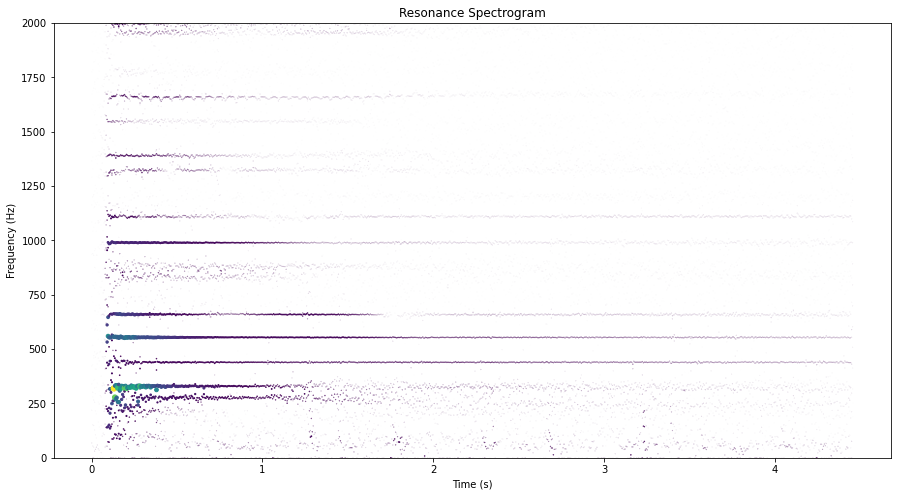

In [5]:
plot_spectrogram(spectrogram, max_freq = 2000, scale=100)

## 3. Fundamental frequency estimation

Obtain the fundamental frequency of a signal and plot it in the orginal resonance spectrogram.

The fundamental frequency of a signal is estimated by calculating the 'harmonicity' of each resonance and selecting the resonance with the highest harmonicity of each spectrum. The harmonicty of a resonance is calculated by summing the power of all the resonances that are close (defined ratio) to an integer multiple of the resonance for which we calculate the harmonicity.

In [14]:
f0 = get_f0(spectrogram)


Plot the fundamental frequency.

In [1]:
plot_f0(spectrogram, f0, max_freq = 2000)

SyntaxError: positional argument follows keyword argument (<ipython-input-1-edff84029de9>, line 1)

In [12]:
#f1 = get_f1(spectrogram) # TODO: Write a function to get first overtone maybe?

NameError: name 'get_f1' is not defined

## 4. Arrows plot

Function to plot the original spectrogram using symbols to represent positive (triangle), negative (inverted triangle) and 'constant' (circle) decays.

- Circle: - 5 < Decay < 5
- Triangle: Decay > 5
- Inverted triangle: Decay < - 5

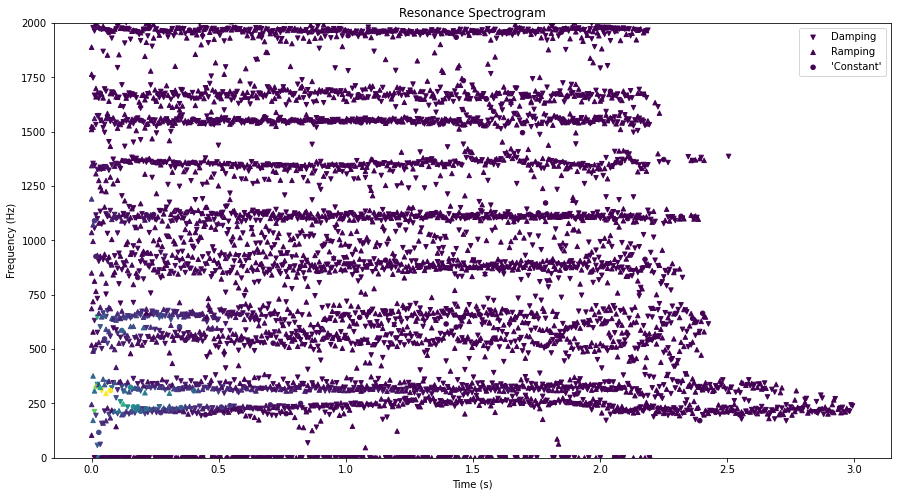

In [16]:
plot_spectrogram_arrows(spectrogram, min_freq = 0, max_freq = 2000)

## 5. Densities

Finally we show the use of the density functions to obtain the continuous and discrete density spectrograms.

The density is calculated using the next formula:
<br>
<br>
$\large\sum_{n = 1}^{N} G(n) \cdot  \sum_{k = 1}^{K} \frac{\pi |d_{k}|^{2}}{\gamma_{k}} \cdot V (\eta - \phi{_k}; \gamma{_k}, \sigma ) $
<br>

Where:

- $ n $ indexes the contiguous slices (spectra) with center in the slice (spectrum) where we want to obtain the density.
- $ G(x) $ is the Gaussian window.
- $ k $ indexes the resonances of the corresponding slice (spectrum)
- $ d_{k}$ is the decay of the k resonance
- $ \gamma_{k}$ is the imaginary part of the complex frequency of the k resonance
- $ V(x; \sigma, \gamma) $ is the Voigt profile.
- $ \eta $ is the angular frequency of the evaluation point
- $ \phi_{k} $ is the angular frequency of the k resonance
- $ \sigma $ is the standard deviation of the Voigt profile (inner Gaussian window)

This density formula can be applied to obtain the density of any point in the spectrgram.

### 5.1 Continuous density spectrogram

The continuous density is calculated for each evenly spaced point in frequency (determined by the precision argument) for each window (slice) of the spectrogram.

In [17]:
cont_density = continuous_density_spectrogram(spectrogram, min_freq = 0, max_freq = 5000, slices_overlap = 7, 
                                              freq_overlap = 200, precision = 500)

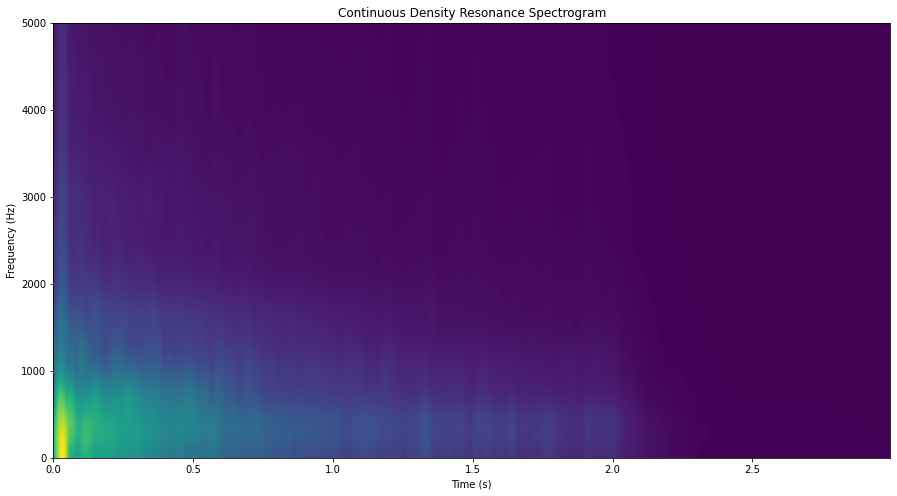

In [18]:
plot_continuous_density_spectrogram(cont_density, spectrogram, precision = 500, min_freq = 0, 
                                    max_freq = 5000, threshold = 0)

### 5.2 Discrete density spectrogram

The discrete density is calculated for each resonance of the spectrogram.

In [19]:
discrete_density = discrete_density_spectrogram(spectrogram, slices_overlap = 7, freq_overlap = 200)

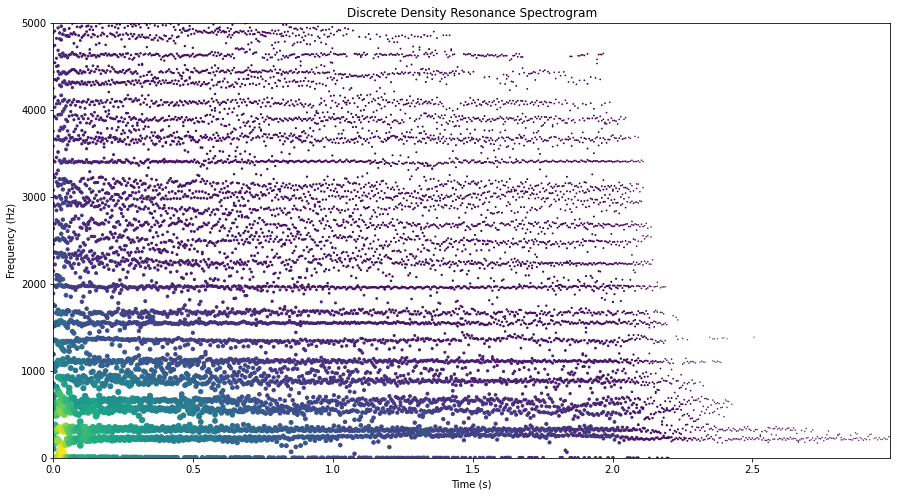

In [20]:
plot_discrete_density_spectrogram(discrete_density, spectrogram, max_freq = 5000, threshold = 0)